# Getting Started

In [47]:
import pandas as pd, numpy as np, glob, seaborn as sns, matplotlib.pyplot as plt, datetime

In [2]:
## Reads all csv in folder
df = pd.concat([pd.read_csv(f, parse_dates=['DATE_TIME'])
                for f in glob.glob('../src/solar_power_generation_india/*Generation*.csv')]
               , ignore_index = True)


In [3]:
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [63]:
## Formats date nd time
df['date'] = pd.to_datetime(df['DATE_TIME'].dt.date)
df['time'] = df['DATE_TIME'].dt.strftime('%H:%M')
df['PLANT_ID'] = df.PLANT_ID.astype(str)

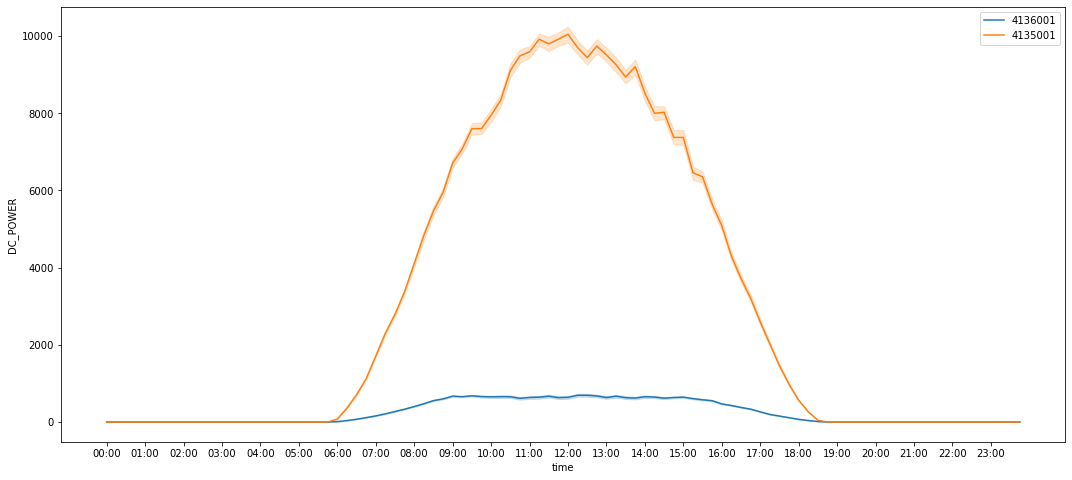

In [86]:
import matplotlib.dates as mdates, matplotlib as mpl;
from matplotlib import ticker
fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot('time', 'DC_POWER', data=df.query("PLANT_ID=='4136001'"), label = '4136001')
sns.lineplot('time', 'DC_POWER', data=df.query("PLANT_ID=='4135001'"), label = '4135001')
positions = np.arange(0, 96, 4)
labels = pd.date_range("00:00", "23:45", freq="1H").strftime('%H:%M').values
ax.xaxis.set_major_locator(ticker.FixedLocator(positions))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))

In [56]:
df.PLANT_ID.value_counts().index.values

array([4135001, 4136001], dtype=int64)

In [62]:
df.PLANT_ID.astype(str).value_counts().index.values

array(['4135001', '4136001'], dtype=object)

In [51]:
pd.date_range("00:00", "23:45", freq="15min").strftime('%H:%M').values

array(['00:00', '00:15', '00:30', '00:45', '01:00', '01:15', '01:30',
       '01:45', '02:00', '02:15', '02:30', '02:45', '03:00', '03:15',
       '03:30', '03:45', '04:00', '04:15', '04:30', '04:45', '05:00',
       '05:15', '05:30', '05:45', '06:00', '06:15', '06:30', '06:45',
       '07:00', '07:15', '07:30', '07:45', '08:00', '08:15', '08:30',
       '08:45', '09:00', '09:15', '09:30', '09:45', '10:00', '10:15',
       '10:30', '10:45', '11:00', '11:15', '11:30', '11:45', '12:00',
       '12:15', '12:30', '12:45', '13:00', '13:15', '13:30', '13:45',
       '14:00', '14:15', '14:30', '14:45', '15:00', '15:15', '15:30',
       '15:45', '16:00', '16:15', '16:30', '16:45', '17:00', '17:15',
       '17:30', '17:45', '18:00', '18:15', '18:30', '18:45', '19:00',
       '19:15', '19:30', '19:45', '20:00', '20:15', '20:30', '20:45',
       '21:00', '21:15', '21:30', '21:45', '22:00', '22:15', '22:30',
       '22:45', '23:00', '23:15', '23:30', '23:45'], dtype=object)

In [ ]:
df['time'].value_counts().reset_index().sort_values(by='index')

In [ ]:
gg = df.groupby(['PLANT_ID', 'time'])[['DC_POWER', 'AC_POWER', 'DAILY_YIELD']].mean()
gg=gg.reset_index()
# gg['time'] = gg['time'].astype(float)

In [ ]:
df.pivot_table(values='DC_POWER', index='time', columns='PLANT_ID')

In [ ]:
pd.to_datetime(df['time'])

In [ ]:
sns.relplot(x='time', y='DC_POWER', col='PLANT_ID', data=gg, kind='line', aspect=1.5)